In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, \
    Reshape, BatchNormalization, Dropout, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from PIL import Image
import neural_structured_learning as nsl
print('Imports successful')

Imports successful


In [2]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')/255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_train[5000:6000]
x_train = x_train[:5000]

In [33]:
encoding_dim = 32
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)

encoded = Dense(encoding_dim, activation='relu', name='encoded')(x)

x = Dense(32, activation='relu')(encoded)
x = Dense(7*7*64, activation='relu')(x)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, (3, 3), (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), (2, 2), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

hist = History()

custom_loss = lambda y_true, y_pred: nsl.lib.jensen_shannon_divergence(y_true, y_pred, axis=0)


autoencoder.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute_error)

In [34]:
import time
first_time=time.time()
autoencoder.fit(x_train, x_train, epochs=200, batch_size=32, shuffle=True, validation_data=(x_val, x_val), callbacks=[hist])

autoencoder.save('model.h5')
print("That took " + str(time.time()-first_time) + " seconds")

Epoch 1/200
157/157 [==============================] - 1s 6ms/step - loss: 0.1410 - val_loss: 0.1177
Epoch 2/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0918 - val_loss: 0.0873
Epoch 3/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0678 - val_loss: 0.0691
Epoch 4/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0593 - val_loss: 0.0590
Epoch 5/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0532 - val_loss: 0.0532
Epoch 6/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0489 - val_loss: 0.0512
Epoch 7/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0463 - val_loss: 0.0484
Epoch 8/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0442 - val_loss: 0.0456
Epoch 9/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0428 - val_loss: 0.0441
Epoch 10/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0414 - val_lo

157/157 [==============================] - 1s 6ms/step - loss: 0.0247 - val_loss: 0.0326
Epoch 82/200
157/157 [==============================] - 1s 6ms/step - loss: 0.0248 - val_loss: 0.0327
Epoch 83/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0247 - val_loss: 0.0333
Epoch 84/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.0327
Epoch 85/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.0326
Epoch 86/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0244 - val_loss: 0.0326
Epoch 87/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.0341
Epoch 88/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0244 - val_loss: 0.0334
Epoch 89/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0243 - val_loss: 0.0328
Epoch 90/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0243 - val_loss: 

157/157 [==============================] - 1s 5ms/step - loss: 0.0218 - val_loss: 0.0328
Epoch 161/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0218 - val_loss: 0.0333
Epoch 162/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0217 - val_loss: 0.0333
Epoch 163/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0216 - val_loss: 0.0334
Epoch 164/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0214 - val_loss: 0.0338
Epoch 165/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0215 - val_loss: 0.0332
Epoch 166/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0214 - val_loss: 0.0334
Epoch 167/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0216 - val_loss: 0.0330
Epoch 168/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0213 - val_loss: 0.0331
Epoch 169/200
157/157 [==============================] - 1s 5ms/step - loss: 0.0214 - v

tf.Tensor([ 4 28 28  1], shape=(4,), dtype=int32)
tf.Tensor([ 4 28 28  1], shape=(4,), dtype=int32)
tf.Tensor([ 28 112], shape=(2,), dtype=int32)
tf.Tensor([ 28 112], shape=(2,), dtype=int32)


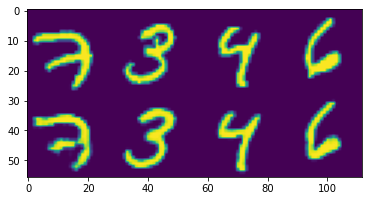

In [35]:
image_autoencoder = autoencoder.predict(x_val[0:4])
image_autoencoder = (image_autoencoder*255).astype(np.uint8)
image_orig = (x_val[0:4]*255).astype(np.uint8)
print(tf.shape(image_autoencoder))
print(tf.shape(image_orig))
image_orig = tf.transpose(image_orig,[1,0,2,3])
image_autoencoder = tf.transpose(image_autoencoder,[1,0,2,3])
image_autoencoder = tf.reshape(np.squeeze(image_autoencoder),[28,-1])
image_orig = tf.reshape(np.squeeze(image_orig),[28,-1])

print(tf.shape(image_autoencoder))
print(tf.shape(image_orig))

im = np.concatenate([image_orig, image_autoencoder],0)
plt.imshow(im)
# im2 = Image.fromarray(np.squeeze(im), 'L')
# im2.show()

In [ ]:
encoderfeatures = encoder.predict(x_val[:500])
label = y_train[5000:5500]

tsne = TSNE(n_components=2, verbose=1, perplexity=23, n_iter=100000, learning_rate=200)
pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=10, n_init=30)

x_tsne = tsne.fit_transform(encoderfeatures)

x = x_tsne[:, 0]
y = x_tsne[:, 1]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.5', '0.3', '0.7']

fig = plt.figure()
for i in range(500):
    plt.scatter(x[i], y[i], c=colors[label[i]], label=label[i] if str(label[i])
                                                                  not in plt.gca().get_legend_handles_labels()[1] else '')

fig.legend()
plt.show()

    #print(str(hist.history.items()))

    #with open('testlog.txt', 'a') as f:
        #f.write('losses for epoch {}, '.format(3) + str(hist.history.items()) + '\n')
# for elem in vectorstudy:
#     print(len(np.argwhere(elem).tolist()))


# first100imgp = autoencoder.predict(x_train[0:100])
# first100imgp = first100imgp*255
# first100imgp = first100imgp.astype('uint8')
# first100imgp = first100imgp.reshape(100, 28, 28)
#
# first100img = x_train[0:100]
# first100img = first100img*255
# first100img = first100img.astype('uint8')
# first100img = first100img.reshape(100, 28, 28)
#
# for i in range(10):
#     image1 = first100img[i, :].squeeze()
#     plt.subplot(10, 2, 2*i+1)
#     plt.imshow(image1, cmap='gray')
#     image2 = first100imgp[i, :].squeeze()
#     plt.subplot(10, 2, 2*i+2)
#     plt.imshow(image2, cmap='gray')
#
# # plt.show()
#
#
# encoderfeatures = encoder.predict(x_train[:500])
# label = y_train[:500]
#
# tsne = TSNE(n_components=2, verbose=1, perplexity=23, n_iter=100000, learning_rate=200)
# pca = PCA(n_components=2)
# kmeans = KMeans(n_clusters=10, n_init=30)
#
# x_tsne = tsne.fit_transform(encoderfeatures)
#
# x = x_tsne[:, 0]
# y = x_tsne[:, 1]
#
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.5', '0.3', '0.7']
#
# fig = plt.figure()
# for i in range(500):
#     plt.scatter(x[i], y[i], c=colors[label[i]], label=label[i] if str(label[i])
#                 not in plt.gca().get_legend_handles_labels()[1] else '')
#
# fig.legend()
# plt.show()